In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
test = pd.read_csv("../input/test-data/test.csv")
train = pd.read_csv("../input/test-data/train.csv")

# preview the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check the number of missing values and other information in the feature
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
# Check the Information of Train and Test Data
train.info()
print("----------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It is a dataset with 81 feature vector. To check all the feauture name:  

In [5]:
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Taking care of Missing values: **

There are a lot of missing values in both categorical feature and in numerical Feature. For numerical feature e will fill out the missing value with the mean value of the feature and for categorical feature we will fill out missing value with the most occured data. If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [6]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #not as much missing values

In [8]:
null_many


,Training,Testing
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
MiscFeature,1406,1408.0
PoolQC,1453,1456.0


From Description of the featre given , we sort out the feauture where null has meaning.

In [9]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [10]:
for i in null_has_meaning:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)

Now we will fill up the missing numerical feature by mean value. 

In [11]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="mean")

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [13]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values

In [14]:
null_many

,Training,Testing
LotFrontage,259,227.0


As LotFrontage has too many missing values we will drop this feature. 

In [15]:
train.drop("LotFrontage", axis=1, inplace=True)
test.drop("LotFrontage", axis=1, inplace=True)

In [16]:
null_few

,Training,Testing
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtUnfSF,0,1.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0
GarageArea,0,1.0


GarageYrBlt, MasVnrArea, and MasVnrType  have the most missing values. MasVnrType is categorical so we will replace the missing values with "None" like before. We ill fill the other with mean. 

In [17]:
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mean(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].mean(), inplace=True)
train["MasVnrType"].fillna("None", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)

Now Lets check which are the numerical feature and which are the categorical feature in the train and test data. 

In [18]:
types_train = train.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

In [19]:
#we should convert num_train and num_test to a list to make it easier to work with
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)

In [20]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [21]:
fill_num = []

for i in numerical_values_train:
    if i in list(null_few.index):
        fill_num.append(i)

In [22]:
print(fill_num)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


Now these are all the numerical feature with missing values. now we will fill out the missing values with mean value. 

In [23]:
for i in fill_num:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(test[i].mean(), inplace=True)

Now for Categorical feature we will fill out the missing values with the most appeared value. so instead of mean or median we will go for mode. 

In [24]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [25]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [26]:
fill_cat = []

for i in categorical_values_train:
    if i in list(null_few.index):
        fill_cat.append(i)

In [27]:
print(fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']


In [28]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = ["Electrical", "Exterior1st", "Exterior2nd", "Functional", "KitchenQual", "MSZoning", "SaleType", "Utilities", "MasVnrType"]

counter = 0
for i in fill_cat:
    most_common[counter] = most_common_term(train[i])
    counter += 1

In [29]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Utilities': ['AllPub'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['None'],
 'Electrical': ['SBrkr'],
 'KitchenQual': ['TA'],
 'Functional': ['Typ'],
 'SaleType': ['WD']}

In [30]:
counter = 0
for i in fill_cat:  
    train[i].fillna(most_common[counter], inplace=True)
    test[i].fillna(most_common[counter], inplace=True)
    counter += 1

In [31]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Training,Testing


**Feature Engineering: **

Now we have taken care of the missing data. Now before training the data we need to do feature engineering which includes encoding the categorical feature, scaling feature values or find out linear relationship between feature and creating new feature values. 

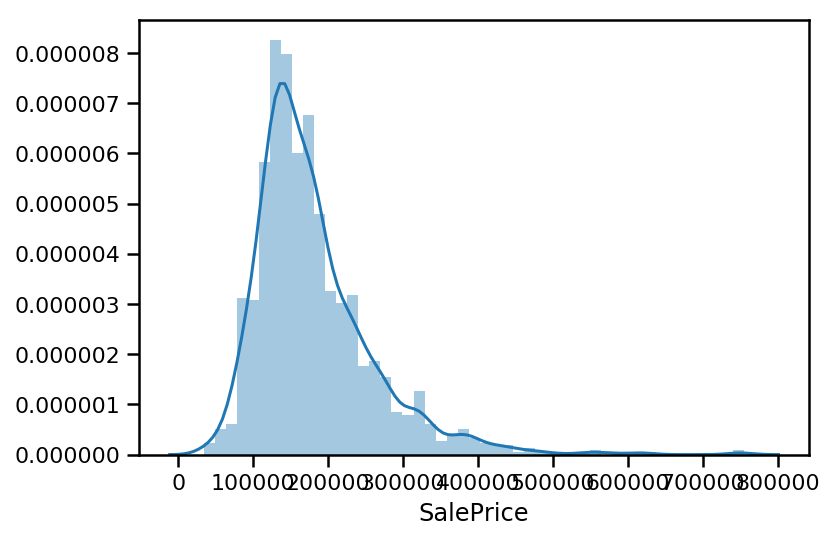

In [32]:
sns.distplot(train["SalePrice"])

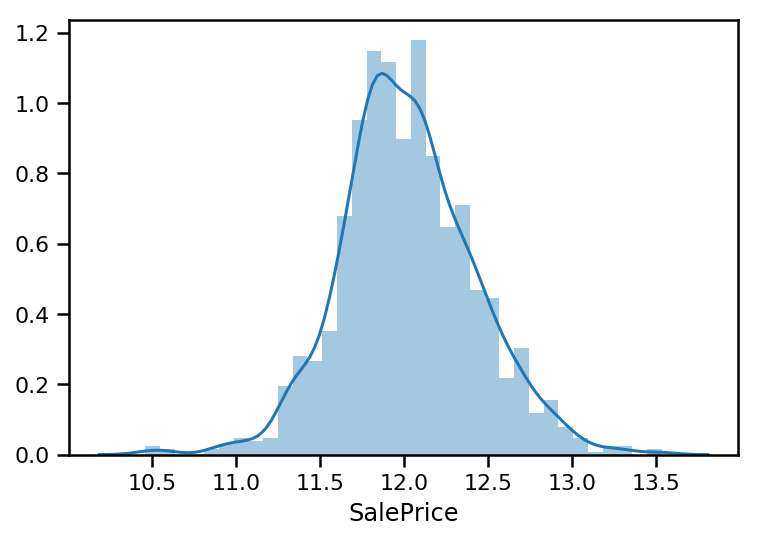

In [33]:
sns.distplot(np.log(train["SalePrice"]))

So when we checked the distribution in target value we found that it is skewed in nature. When we took the log of it it gave more normal distribution. Machine learning algorithm works better for normal distributed data. so taking the log of training data might improve the results. 

In [34]:
train["TransformedPrice"] = np.log(train["SalePrice"])

Now, let's take a look at all the categorical features in the data that need to be transformed.

In [35]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [36]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [37]:
for i in categorical_values_train:
    feature_set = set(train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        train.loc[train[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(test[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        test.loc[test[i] == j, i] = feature_list2.index(j)

Now we are ready to build our models!

**Training and Testing ML models: **

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score, KFold

In [40]:
X_train = train.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_train = train["TransformedPrice"].values
X_test = test.drop("Id", axis=1).values

To avoid overfitting the model we will split the dataset into validation sets. 

In [41]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [42]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Best Score: 0.8700622544875901


In [43]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R^2 Score: 0.6774177930892752
RMSE Score: 0.22099523778008948


**Lasso Model**

In [45]:
lasso = Lasso()
parameters_lasso = {"fit_intercept" : [True, False], "normalize" : [True, False], "precompute" : [True, False], "copy_X" : [True, False]}
grid_lasso = GridSearchCV(lasso, parameters_lasso, verbose=1, scoring="r2")
grid_lasso.fit(X_training, y_training)

print("Best Lasso Model: " + str(grid_lasso.best_estimator_))
print("Best Score: " + str(grid_lasso.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'precompute': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

Best Lasso Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=True, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Best Score: 0.7970543955707813


In [46]:
lasso = grid_lasso.best_estimator_
lasso.fit(X_training, y_training)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=True, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R^2 Score: 0.5346174829161123
RMSE Score: 0.26544083993038475


**Ridge Model: **

In [47]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'solver': ['auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.871973259456189


In [48]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R^2 Score: 0.6916911200623934
RMSE Score: 0.2160507247721305


**Decission Tree Regression**

In [49]:
dtr = DecisionTreeRegressor()
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [2, 3, 5, 10],
                 

Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Best Score: 0.7347275649465045


In [50]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_training, y_training)
dtr_pred = dtr.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

R^2 Score: 0.7194842550544945
RMSE Score: 0.2060826034172855


**Random Forest Regression: **

In [51]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'

Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Best Score: 0.8612052615917771


In [52]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R^2 Score: 0.8648858566037676
RMSE Score: 0.14302538217650093


**Evaluating Models**

In [ ]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Lasso", "Decision Tree Regressor", "Random Forest Regressor"],
    "Best Score" : [grid_linreg.best_score_,  grid_ridge.best_score_, grid_lasso.best_score_, grid_dtr.best_score_, grid_rf.best_score_],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5], str(r2_dtr)[0:5], str(r2_rf)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8], str(rmse_dtr)[0:8], str(rmse_rf)[0:8]]
})
model_performances.round(4)

print("Sorted by Best Score:")
model_performances.sort_values(by="Best Score", ascending=False)
